In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
import math
%matplotlib inline 
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('Offenses known 2013.csv', skiprows=4)

In [3]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [4]:
df.head(20)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [5]:
# Check what type of data I have.
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [6]:
# Rename murder to a more convenient name.
df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df['Property Crime'] = df['Property\ncrime']

# first remove the commas 
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Property Crime'] = df['Property Crime'].str.replace(',', '')

In [7]:
# change robbery, and population to int.
df[['Robbery', 'Population', 'Murder']] = df[['Robbery', 'Population', 'Murder']].apply(pd.to_numeric)

In [8]:
# Make population squared.
df['Popsqrd'] = df['Population'] * df['Population']

In [9]:
# Remove the Nan and show that my data is now useable. 
print(df[['City', 'Population', 'Popsqrd', 'Murder', 'Robbery' ]].dropna())

                           City  Population         Popsqrd  Murder  Robbery
0                 Adams Village    1861.000     3463321.000   0.000    0.000
1      Addison Town and Village    2577.000     6640929.000   0.000    0.000
2                 Akron Village    2846.000     8099716.000   0.000    0.000
3                        Albany   97956.000  9595377936.000   8.000  227.000
4                Albion Village    6388.000    40806544.000   0.000    4.000
5                Alfred Village    4089.000    16719921.000   0.000    3.000
6              Allegany Village    1781.000     3171961.000   0.000    0.000
7                  Amherst Town  118296.000 13993943616.000   1.000   31.000
8            Amityville Village    9519.000    90611361.000   0.000    4.000
9                     Amsterdam   18182.000   330585124.000   0.000   12.000
10               Arcade Village    2053.000     4214809.000   0.000    0.000
11              Ardsley Village    4523.000    20457529.000   0.000    3.000

# U2 L4 P4 Challenge: Make My Own Regression Model
Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [10]:
# Make violent crime a usable stat. Get rid of the commas.
df['Violent Crime'] = df['Violent\ncrime'].str.replace(',', '')
# Turn Violent Crime into an int.
df['Violent Crime'] = df['Violent Crime'].apply(pd.to_numeric)
# Turn Property Crime into an int. Already transformed it up top in an earlier cell.
df['Property Crime'] = df['Property Crime'].apply(pd.to_numeric)



In [11]:
# Make sure that all the data that I've selected is usable. 
data = df[['Murder', 'Robbery', 'Population', 'Violent Crime', 'Property Crime']].dropna()

In [12]:
# Attempting to clean the data a bit before using it.
data.describe()

,Murder,Robbery,Population,Violent Crime,Property Crime
count,348.000,348.000,348.000,348.000,348.000
mean,1.566,72.902,40037.632,201.595,792.606
std,18.304,1031.033,450037.368,2815.269,7659.725
min,0.000,0.000,526.000,0.000,0.000
25%,0.000,0.000,3003.000,2.000,40.500
50%,0.000,1.000,7233.500,6.000,112.500
75%,0.000,5.000,18427.500,22.000,341.000
max,335.000,19170.000,8396126.000,52384.000,141971.000


- Noticed that murder and robbery have an insanely large range, so I will change them both into categorical variables to see what happens.
- Changing either of them to booleans gave me the R^2 value of (-.013). Will dismiss and use something else.
- Dropping row 216 lowered the R^2 so maybe allowing less outliers will reduce overfitting.

In [13]:
# data['Murder_cat'] = np.where(data.loc[:, 'Murder']>=0, 1, 0) 
# data['Robbery_cat'] = np.where(data.loc[:, 'Robbery']>=0, 1, 0) 
# Remove the outlier in Robbery
# print(data[data['Robbery'] > 5000]) only row 216. remove
data = data.drop([216])

(array([285.,  44.,   6.,   7.,   1.,   1.,   0.,   1.,   1.,   1.]),
 array([   526. ,  26352.3,  52178.6,  78004.9, 103831.2, 129657.5,
        155483.8, 181310.1, 207136.4, 232962.7, 258789. ]),
 <a list of 10 Patch objects>)

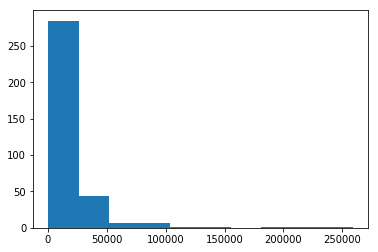

In [14]:
# Control for population 
plt.hist(data['Population']) 

In [15]:
data = data.query('Population<65000')

Most population counts aren't over 50k but I will use up to 65k to account for some of the outliers.

In [16]:
data.describe()

,Murder,Robbery,Population,Violent Crime,Property Crime
count,333.000,333.000,333.000,333.000,333.000
mean,0.219,6.712,11634.640,22.399,244.967
std,0.917,21.581,12375.324,60.894,368.681
min,0.000,0.000,526.000,0.000,0.000
25%,0.000,0.000,2846.000,2.000,38.000
50%,0.000,1.000,6794.000,6.000,107.000
75%,0.000,4.000,15374.000,18.000,313.000
max,10.000,204.000,61686.000,584.000,2807.000


Hopefully, this time around things might look better.

In [18]:
# Model with just X and Y were grossly overfitted. Must fix
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Population','Robbery','Violent Crime', 'Murder']]
# Square the parameters so that we can achieve homoscedasticity.
data['Robbery Sqrd'] = data['Robbery'] * data['Robbery']
data['Violent Crime Sqrd'] = data['Violent Crime'] * data['Violent Crime']
data['Murder Sqrd'] = data['Murder'] * data['Murder']
data['Population Sqrd'] = data['Population'] * data['Population']
data['Property Crime Sqrd'] = data['Property Crime'] * data['Property Crime']
 

X2 = data[['Robbery Sqrd', 'Violent Crime Sqrd', 'Murder Sqrd', 'Population Sqrd']]
Y2 = data['Property Crime Sqrd'].values.reshape(-1, 1)

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.62739387e-02 -7.50619365e+00  6.02236144e+00 -5.82503701e+01]]

Intercept: 
 [-16.12271574]

R-squared:
0.8263741107495083


Controlling for outliers proved to be a better way of achieving an explained variance score that isn't overfitted. 

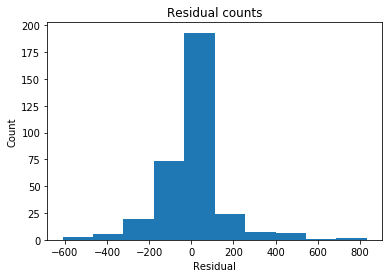

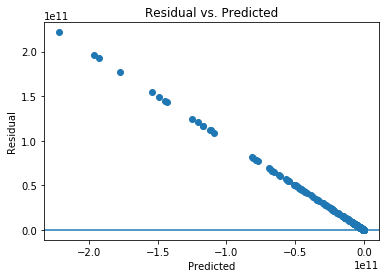

In [19]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Property Crime']

# Calculate the error, aka residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Use the square values of the features to achieve homoskedasticity
predicted2 = regr.predict(X2).ravel()
residual2 = actual - predicted2

plt.scatter(predicted2, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


- Lowering the population count from 75k to 65k made only a slight difference in my actual vs predicted plot.
- Removing outliers allowed my model to resemble more closely to the multivariate normality assumption.
- My regression model is more homoskedastic now, but it's in a descending manner instead of ascending manner.
- I chose to use population, robbery, murder, and violent crimes because I thought those would be the things that had the biggest correlation with property crime. 
- After removing outliers, my model isn't as overfitted and can supposedly evaluate 82% of the variance within the model. 

# Cross Fold Validation

I will attempt to see if any of my variables are overfitting now. 

In [27]:
model = regr.fit(X, Y)

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, Y, cv=5)

array([0.81216744, 0.54001992, 0.78535785, 0.69236108, 0.88903254])

I ran a cross fold validation on my data. It ranges a lot but it seems that none of my variables are overfitting too much. 